In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [111]:
data=pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\python lecture\ecommerce_orders_1200 (1).csv")

In [112]:
data

,Order_ID,Customer_Name,Customer_Email,Product_Name,Category,Quantity,Price,Total_Amount,Order_Date,Payment_Method,City,Delivery_Status
0,1,Sneha,sneha435@gmail.com,Smartphone,Electronics,2,23057.27,46114.54,2025-01-25,UPI,Chennai,Delivered
1,2,Isha,isha583@gmail.com,Bag,Fashion,3,16337.80,49013.40,2025-03-04,Credit Card,Hyderabad,Cancelled
2,3,Vihaan,vihaan219@gmail.com,Smartphone,Electronics,3,46457.72,139373.16,2025-11-01,Cash on Delivery,Ahmedabad,Delivered
3,4,Nisha,nisha779@gmail.com,Charger,Books,2,23766.06,47532.12,2025-09-06,UPI,Mumbai,Cancelled
4,5,Isha,isha957@gmail.com,Smartphone,Electronics,3,33445.77,100337.31,2025-09-23,Credit Card,Ahmedabad,Delivered
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1196,Isha,isha390@gmail.com,Shoes,Accessories,4,46451.01,185804.04,2025-02-22,Cash on Delivery,Delhi,Delivered
1196,1197,Nisha,nisha915@gmail.com,Bag,Accessories,2,44155.86,88311.72,2025-06-05,Credit Card,Chennai,Cancelled
1197,1198,Sneha,sneha126@gmail.com,Camera,Books,4,22038.36,88153.44,2025-03-07,Cash on Delivery,Mumbai,Delivered
1198,1199,Priya,priya949@gmail.com,Watch,Electronics,5,47576.11,237880.55,2025-01-16,Credit Card,Bangalore,Cancelled


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         1200 non-null   int64  
 1   Customer_Name    1200 non-null   object 
 2   Customer_Email   1200 non-null   object 
 3   Product_Name     1200 non-null   object 
 4   Category         1200 non-null   object 
 5   Quantity         1200 non-null   int64  
 6   Price            1200 non-null   float64
 7   Total_Amount     1200 non-null   float64
 8   Order_Date       1200 non-null   object 
 9   Payment_Method   1200 non-null   object 
 10  City             1200 non-null   object 
 11  Delivery_Status  1200 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 112.6+ KB


In [114]:
data.isnull().sum()

Order_ID           0
Customer_Name      0
Customer_Email     0
Product_Name       0
Category           0
Quantity           0
Price              0
Total_Amount       0
Order_Date         0
Payment_Method     0
City               0
Delivery_Status    0
dtype: int64

In [115]:
data.head()

,Order_ID,Customer_Name,Customer_Email,Product_Name,Category,Quantity,Price,Total_Amount,Order_Date,Payment_Method,City,Delivery_Status
0,1,Sneha,sneha435@gmail.com,Smartphone,Electronics,2,23057.27,46114.54,2025-01-25,UPI,Chennai,Delivered
1,2,Isha,isha583@gmail.com,Bag,Fashion,3,16337.80,49013.40,2025-03-04,Credit Card,Hyderabad,Cancelled
2,3,Vihaan,vihaan219@gmail.com,Smartphone,Electronics,3,46457.72,139373.16,2025-11-01,Cash on Delivery,Ahmedabad,Delivered
3,4,Nisha,nisha779@gmail.com,Charger,Books,2,23766.06,47532.12,2025-09-06,UPI,Mumbai,Cancelled
4,5,Isha,isha957@gmail.com,Smartphone,Electronics,3,33445.77,100337.31,2025-09-23,Credit Card,Ahmedabad,Delivered


In [116]:
data.rename(columns={"Category":"Product_Category"},inplace=True)

In [117]:
data.columns

Index(['Order_ID', 'Customer_Name', 'Customer_Email', 'Product_Name',
       'Product_Category', 'Quantity', 'Price', 'Total_Amount', 'Order_Date',
       'Payment_Method', 'City', 'Delivery_Status'],
      dtype='object')

# Which city has the highest total sales?

--> This graph helps identify in which city the company earns the most revenue. Focus marketing in those cities.

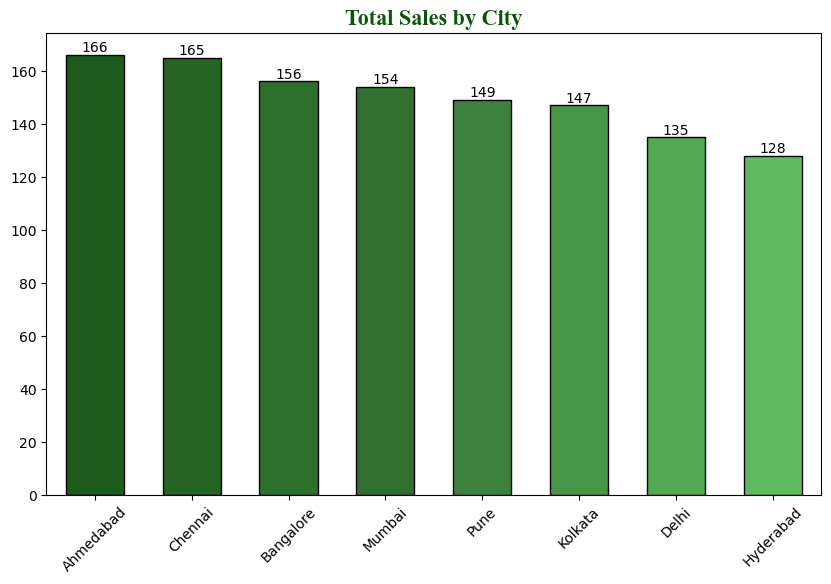

In [125]:
Sales_by_City=data.groupby("City")["Total_Amount"].count().sort_values(ascending=False)

plt.figure(figsize=(10,6))

C1= ["#136413", "#1A6D1A", "#217b21", '#267a26', '#308e30', '#3aa23a', '#45b645', '#50ca50']

A1=sns.barplot(x=Sales_by_City.index, y=Sales_by_City.values, width=0.6,palette=C1, edgecolor="black", linewidth=1)

plt.title("Total Sales by City", family="Times New Roman",fontsize=16, fontweight="bold", color="#085608")

plt.xlabel("")

plt.xticks(rotation=45)

for i in A1.containers:
    A1.bar_label(i)


plt.show()


# Which payment method is most used by customers?

--> The bar graph shows that Credit Card and UPI are the most frequently used payment methods by customers. This means most customers prefer digital payment options instead of Cash on Delivery.

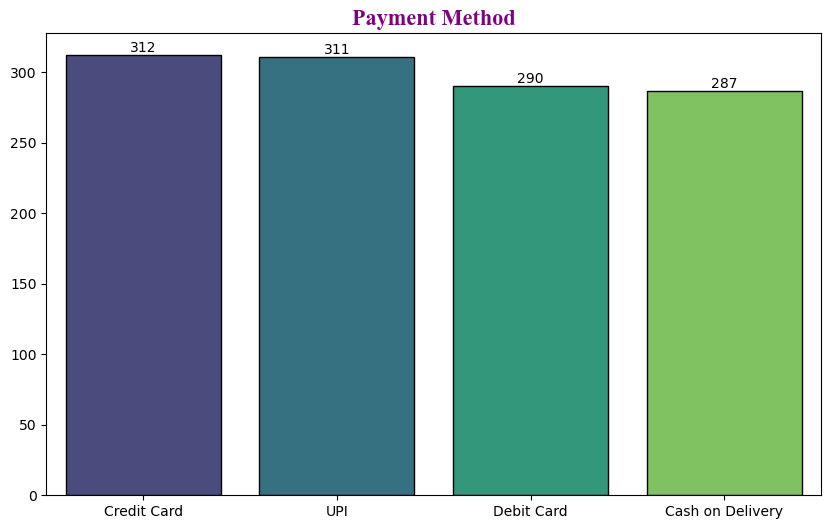

In [126]:
plt.figure(figsize=(10,6))

D1=data["Payment_Method"].value_counts()

A2= sns.barplot(x=D1.index,y=D1.values,palette="viridis",edgecolor="black",width=0.8)

plt.title("Payment Method", family="Times New Roman",fontsize=16, fontweight="bold", color="Purple")

plt.xlabel("")

for y in A2.containers:
    A2.bar_label(y)

plt.show()

# Which does the "Number of Orders by Product Category" graph explain

--> This graph explain which product category received the highest and lowest number of orders. It shows that Accessories have the most oders while Electronics have the least, helping to understand customer buying preferences.

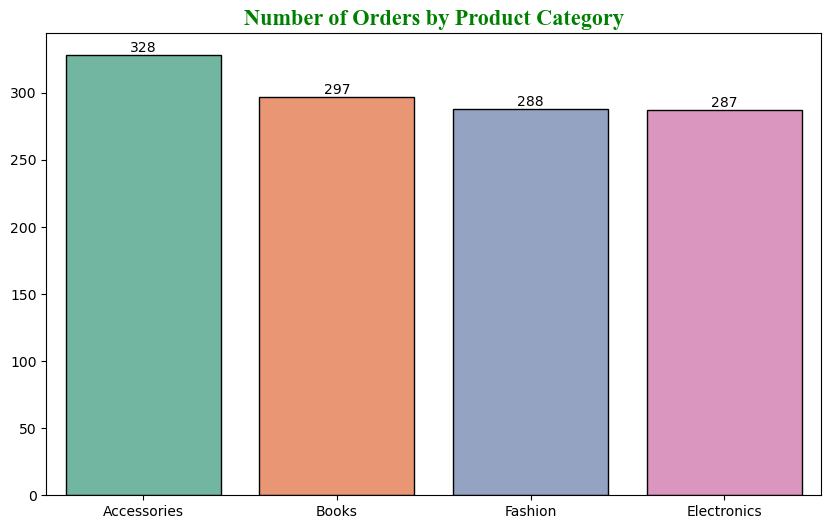

In [120]:

cat_order = data['Product_Category'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10,6))

A3=sns.countplot(x="Product_Category",data=data,order=cat_order.index,palette="Set2",edgecolor="black",width=0.8)

plt.title("Number of Orders by Product Category", fontsize=16, color='green', fontweight='bold', family="Times New Roman")

for b in A3.containers:
    A3.bar_label(b)

plt.xlabel("")

plt.ylabel("")

plt.show()

# What does the "Orders by Category and Payment Method" graph explain?

--> This graph explains the total number of orders received in each product category like Accessories, Books, Fashion, and Electronics. It helps us understand which category is most popular among customers. From the graph  we can see that Accessories have the highest number of orders, while Electronics have the lowest — showing customer preference towards Accessories products.

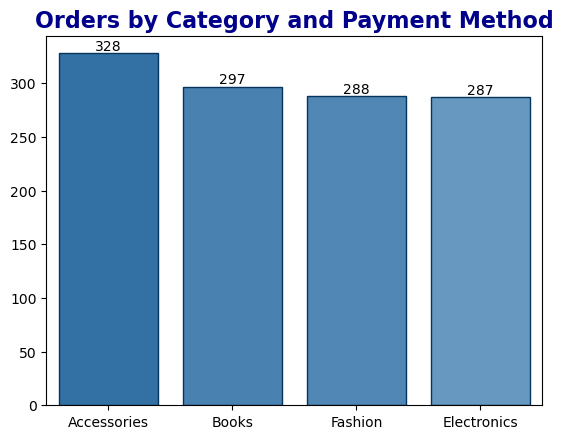

In [121]:
E1 = data['Product_Category'].value_counts().sort_values(ascending=False)

plt.Figure(figsize=(10,6))

A1=["#2072B6", "#3883C1", "#4089C5", "#589ACF"]

A4=sns.countplot(x="Product_Category",data=data,order=E1.index,palette=A1,edgecolor="#05355C",width=0.8)

plt.title("Orders by Category and Payment Method",fontsize=16, color="darkblue",fontweight="bold")

for c in A4.containers:
    A4.bar_label(c)


plt.xlabel("")

plt.ylabel("")

plt.show()

# Which Payment method has the highest quantity of orders across all product categories?

--> From the graph, we can observe that UPI has the highest number of orders in most product categories, followed by Credit Card and Cash on Delivery.This indicates that customers prefer using UPI as a convenient and quick payment option compared to other methods.

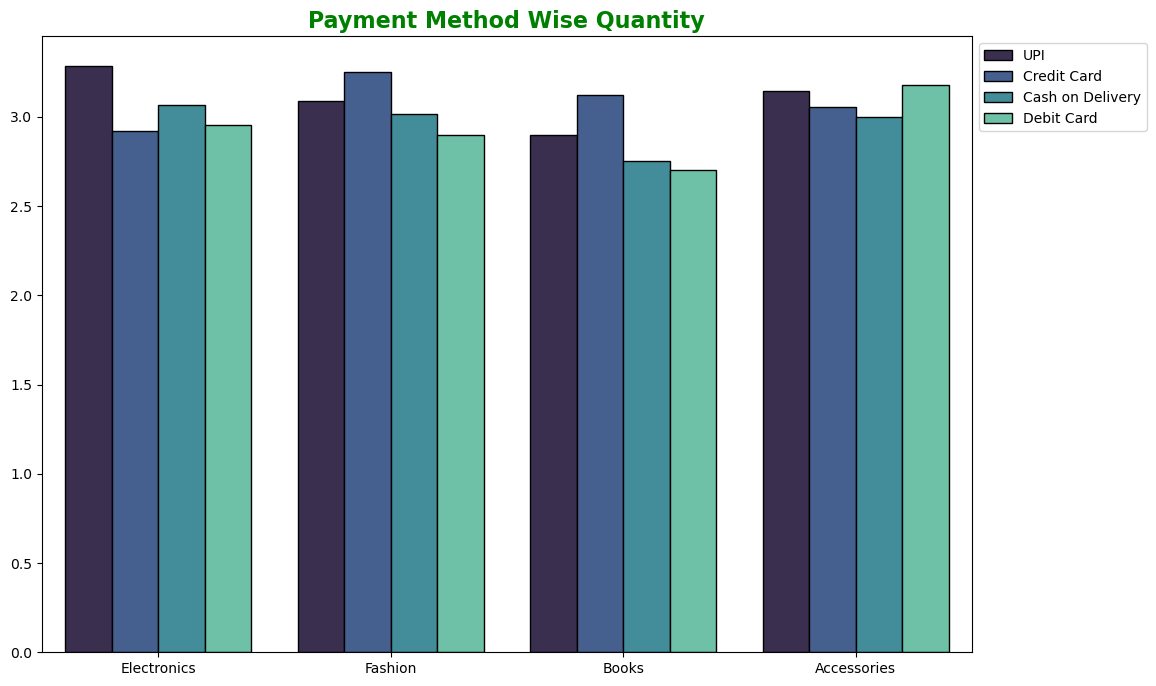

In [122]:
plt.figure(figsize=(12,8))

sns.barplot(x="Product_Category", y="Quantity", hue="Payment_Method", data=data, palette="mako", edgecolor="black",errorbar=None)

plt.title("Payment Method Wise Quantity",fontsize=16, color="green",fontweight="bold")



plt.legend(loc="upper left",bbox_to_anchor=(1,1))

plt.xlabel("")

plt.ylabel("")

plt.show()

# What can you interpret from the Category-wise Delivery Status line chart?

--> The chart shows that most categories have higher delivered orders compared to pending or cancelled ones. However, in some categories like Electronics or Clothing, the number of pending deliveries is relatively higher, indicating possible shipping delays or stock issues

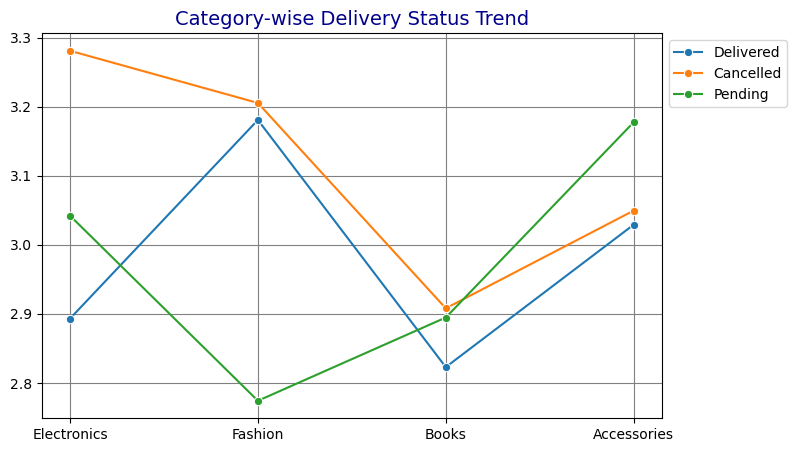

In [123]:
plt.figure(figsize=(8,5))

sns.lineplot(x='Product_Category',y='Quantity',hue='Delivery_Status',data=data,marker='o',errorbar=None)

plt.title('Category-wise Delivery Status Trend', fontsize=14, color='darkblue')

plt.xlabel("")

plt.ylabel("")

plt.legend(loc="upper left",bbox_to_anchor=(1,1))

plt.grid(color="grey")

plt.show()

# What does the “City-wise Orders Distribution” pie chart explain?

--> The pie chart shows the percentage of total orders received from each city. From the chart, we can observe that Mumbai and Delhi contribute the largest share of total orders, while Pune and Kolkata have a smaller portion. This helps in identifying which cities are the major markets for sales and customer engagement.

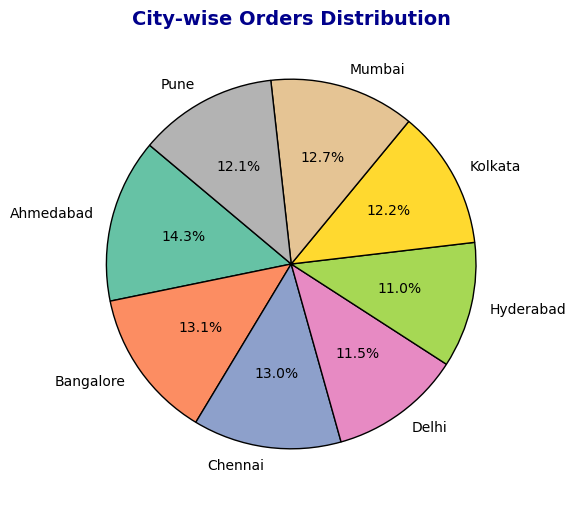

In [124]:

city_orders = data.groupby("City")["Quantity"].sum()

plt.figure(figsize=(6,6))

plt.pie(city_orders, labels=city_orders.index, autopct='%1.1f%%', startangle=140,colors=plt.cm.Set2.colors, wedgeprops={'edgecolor':'black'})

plt.title("City-wise Orders Distribution", fontsize=14, fontweight='bold', color='darkblue')

plt.show()

# Conclusion for the Project:



#### In this project, we analyzed an E-commerce dataset we used Python libraries like Pandas, Matplotlib, and Seaborn to clean, visualize, and understand the data through various graphs. Different types of charts such as bar charts, pie charts, line charts, and count plots were used to represent relationships between product categories, payment methods, cities, and delivery status. 

#### From the analysis, we observed that: 
#### Accessories and Fashion categories have the highest number of orders.
#### UPI is the most preferred payment method among customers.
#### Mumbai and Delhi have the maximum sales, indicating strong customer engagement in metro cities.
#### Most orders were successfully delivered, showing good operational performance.

#### Overall, this project helped in understanding sales patterns, customer preferences, and delivery efficiency using Python-based data visualization tools. It demonstrates how data analytics can help businesses make better decisions and improve their sales strategies.